In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats

### Generate the data

In [9]:
def generate_data(theta=1, n=50):
    return scipy.stats.uniform(scale=theta).rvs(size=n)

### The estimator

In [20]:
def estimator(data):
    return max(data)

### Bootstrap replications

In [56]:
def bootstrap_resample(data):
    return random.choices(population=data, k=len(data))

def bootstrap_replications(data=generate_data(), estimator=estimator, B=1000):
    return [estimator(bootstrap_resample(data)) for _ in range(B)]

### Compare the bootstrap distribution with the true distribution of the estimator

The true PDF of the estimator

In [112]:
def f(x, n=50):
    if 0 < x < 1:
        return n*(x**(n-1))

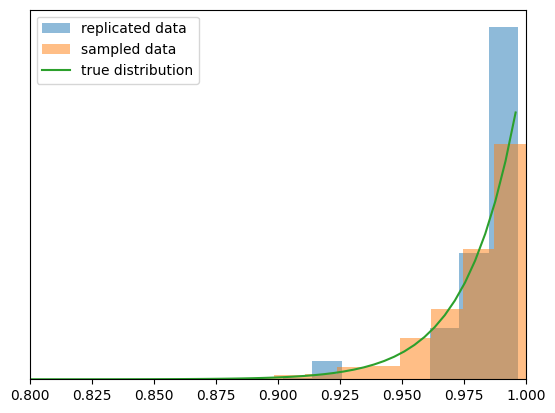

In [133]:
trials = 500

# Focuses the graphs on the meaningful region where x > lower_x_cutoff
lower_x_cutoff = 0.8

# Do we want to show the sampled distribution as well?
show_sample_distribution = True

# Generate the bootstrap data
replicated_data = np.array(bootstrap_replications())

# Plot the bootstrap data
plt.hist(replicated_data, alpha=0.5, density=True, label='replicated data')

# If desired, plot the sampled distribution
if show_sample_distribution:
    sampled_data = [estimator(generate_data()) for _ in range(trials)]
    plt.hist(sampled_data, alpha=0.5, density=True, label='sampled data')
    
# Plot the true distribution
x = np.linspace(start=lower_x_cutoff, stop=1, num=50)
y = [f(xi) for xi in x]
plt.plot(x, y, label='true distribution')

# Plot legend and axes
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_xlim((lower_x_cutoff, 1))
ax.get_yaxis().set_visible(False)
plt.show()